# Introduction
 ***Hello and welcome to my data analysis workshop!***
In this notebook, I’ll be working with an airline bookings dataset to explore trends, customer preferences, and demand patterns. I'll also visualize the insights using various charts to help uncover meaningful business insights

![Airplane Image](https://images.theconversation.com/files/578175/original/file-20240227-28-cejldv.jpg?ixlib=rb-4.1.0&rect=0%2C0%2C7668%2C3828&q=45&auto=format&w=1356&h=668&fit=crop)




# Setting up the enviroment
**To begin, we’ll set up the environment and import the dataset for analysis.**

In [11]:
# setting up the enviromnet
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#load csv file....
customer_booking_data = pd.read_csv("/content/customer_booking.csv",encoding ='windows=1252')

#view first few lines of the dataset.....
customer_booking_data.head()


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Since the dataset is encoded in Windows-1252, we’ll convert it to UTF-8 to ensure compatibility for further analysis**

In [13]:
customer_booking_data.to_csv('your_file_utf-8.csv', index= False,encoding = 'utf-8')
print("✅ Dataset successfully saved in UTF-8 encoding.")
print('Now its ready for further analysis')
customer_booking_data.head()


✅ Dataset successfully saved in UTF-8 encoding.
Now its ready for further analysis


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


**Dataset Overview: Columns Description**

Let’s take a look at the columns present in the dataset and understand what each one represents.


In [14]:
print(customer_booking_data.columns)

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')


**num_passengers** = number of passengers travelling
**sales_channel** = sales channel booking was made on
**trip_type** = trip Type (Round Trip, One Way, Circle Trip)
**purchase_lead** = number of days between travel date and booking date
**length_of_stay** = number of days spent at destination
**flight_hour** = hour of flight departure
**flight_day** = day of week of flight departure
**route = origin** -> destination flight route
**booking_origin** = country from where booking was made
**wants_extra_baggage** = if the customer wanted extra baggage in the booking
**wants_preferred_seat** = if the customer wanted a preferred seat in the booking
**wants_in_flight_meals** = if the customer wanted in-flight meals in the booking
**flight_duration** = total duration of flight (in hours)
**booking_complete** = flag indicating if the customer completed the booking

# 1. **Data Cleaning**

Before moving to the analysis, we’ll clean the dataset by:
- Handling missing values
- Removing duplicates
- Standardizing categorical fields
- Checking for inconsistent data types


In [15]:
#Handling missing values....
customer_booking_data.isnull().sum()

,0
num_passengers,0
sales_channel,0
trip_type,0
purchase_lead,0
length_of_stay,0
flight_hour,0
flight_day,0
route,0
booking_origin,0
wants_extra_baggage,0


After inspecting the dataset, we found that there are **no missing values** in any column. This means we can proceed with our analysis without needing to handle null entries or impute data.  
This also suggests the dataset is relatively clean and ready for further preprocessing.


In [16]:
#Removing duplicates values....

customer_booking_data.duplicated().sum() #to check for duplicates values

customer_booking_data = customer_booking_data.drop_duplicates() #to drop/delete duplicate values


Upon inspection, we found **716 duplicate rows** in the dataset.  
Duplicate records can skew analysis, especially in aggregation or frequency-based insights.

To ensure accuracy and consistency, we removed them using the `.drop_duplicates()` method

In [17]:
#Standardizing categorical fields.....
customer_booking_data['sales_channel'].unique()
customer_booking_data['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

To ensure consistency in the dataset, we reviewed the categorical columns such as `sales_channel`, `trip_type`, and `booking_origin` for formatting issues like inconsistent casing or extra whitespace.

After checking the unique values in these columns, we found that the data was already standardized — all entries were clean, consistently formatted, and required no further cleaning.

This indicates that the dataset is well-prepared for analysis with respect to categorical variables

In [18]:
#Checking for inconsistent data types....
customer_booking_data.dtypes

,0
num_passengers,int64
sales_channel,object
trip_type,object
purchase_lead,int64
length_of_stay,int64
flight_hour,int64
flight_day,object
route,object
booking_origin,object
wants_extra_baggage,int64


**Data Type Validation**

We reviewed the data types of each column to ensure they are appropriate for analysis.  
This step is important because incorrect types (like numbers stored as strings or dates stored as objects) can interfere with analysis and visualization.

After inspecting with `df.dtypes`, we confirmed that:
- Numerical columns are correctly typed as `int` or `float`
- Categorical columns are of type `object`

No major inconsistencies were found, so the dataset is ready for analysis.


# 2. *Univariate Analysis*

Let’s analyze the distribution of key variables like `purchase_lead` and `trip_type` to understand general trends in customer behavior.


# 2.1 Distribution of `purchase_lead`

/tmp/ipython-input-3967718825.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data= customer_booking_data['purchase_lead'], shade= True)


Text(0.5, 1.0, 'Distribution of Purchase Lead Time')

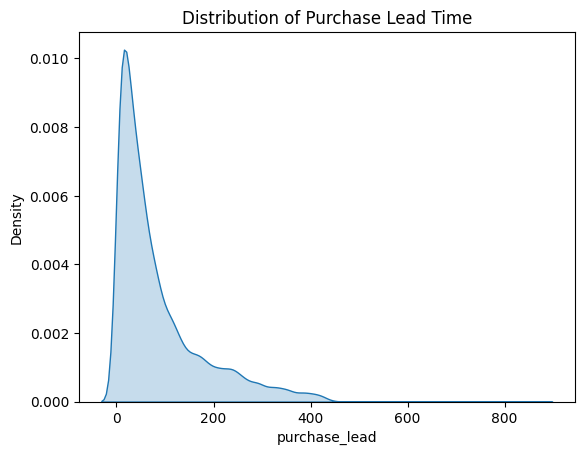

In [19]:
# We’ll plot a smoothed histogram (KDE plot) to observe the distribution of lead times between booking and flight departure
sns.kdeplot(data= customer_booking_data['purchase_lead'], shade= True)

# Setting the title for the KDE plot
plt.title("Distribution of Purchase Lead Time")


**📊 Interpretation: Distribution of Purchase Lead Time**

From the KDE plot above, we observe that most customers tend to book their flights very close to the departure date. The distribution is **right-skewed**, meaning:

- A large concentration of bookings happens between **0 to 50 days** before departure.
- There are **a few outliers** where customers book more than 200 days in advance, but these are relatively rare.
- The long tail indicates that while most customers book close to their travel date, there are some early planners.

This pattern is typical in consumer travel behavior — many travelers book within a few weeks of their intended flight.


# 2.2 **Distribution of Trip Type**

We'll now examine how `trip_type` are distributed across the dataset. This tells us whether customers are more often traveling for one-way or round trips.


In [20]:
customer_booking_data['trip_type'].value_counts # counting total individual num of trip type

<bound method IndexOpsMixin.value_counts of 0        RoundTrip
1        RoundTrip
2        RoundTrip
3        RoundTrip
4        RoundTrip
           ...    
49995    RoundTrip
49996    RoundTrip
49997    RoundTrip
49998    RoundTrip
49999    RoundTrip
Name: trip_type, Length: 49281, dtype: object>

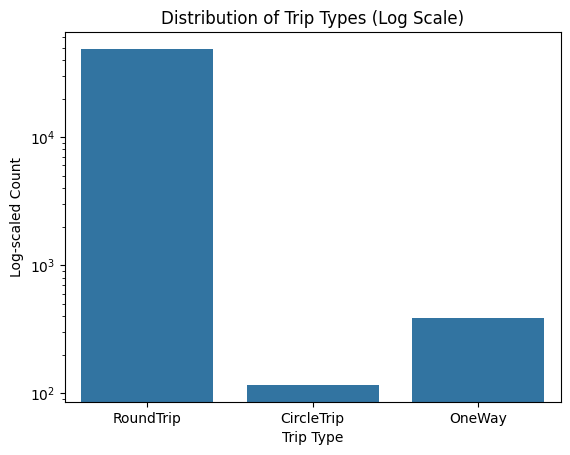

In [21]:
sns.countplot(data = customer_booking_data, x= 'trip_type')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title("Distribution of Trip Types (Log Scale)")
plt.xlabel("Trip Type")
plt.ylabel("Log-scaled Count")
plt.show()

We observe that the majority of bookings were for **round trips**, followed by **one-way trips**.  
**Circle trips** were the least common, indicating they are either less preferred or less frequently offered.

- **Round Trip**: Travel from origin to destination and then back to the origin via the same route.
- **Circle Trip**: Travel through multiple destinations in a loop, returning to the original point via a different path.
- **One-Way Trip**: Travel from origin to destination with no return ticket.


# 2.3 Sales Channel Preferences

Analyzing how customers book their flights can provide insight into channel performance — whether users prefer through Internet or Mobile booking using `sales_channel`.


In [22]:
customer_booking_data['sales_channel'].unique()
customer_booking_data['sales_channel'].value_counts()

,count
sales_channel,
Internet,43917
Mobile,5364


Text(0.5, 1.0, 'Sales Channel Preferences')

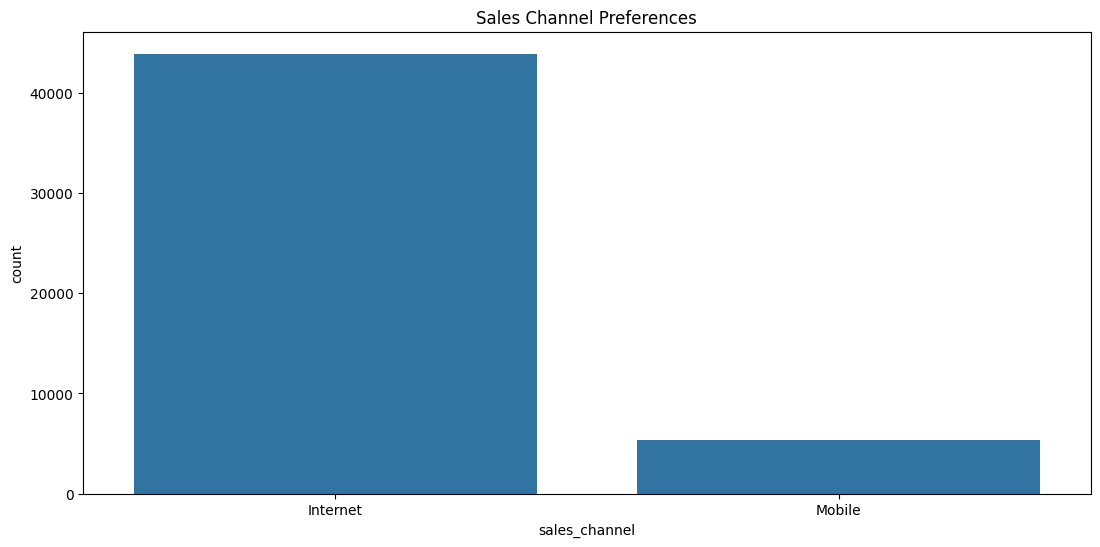

In [23]:
plt.figure(figsize=(13,6))
sns.countplot(data = customer_booking_data,x ='sales_channel')
plt.title('Sales Channel Preferences')

As we can see from the count plot above, the majority of bookings were made via the **Internet (43,917 bookings)**, compared to **Mobile (5,364 bookings)**.
This clearly indicates that customers prefer using the Internet (likely desktop or browser-based platforms) over mobile apps or devices for booking their flights

# 2.4 Flight Day Analysis

Let’s explore the distribution of `flight_day` across the days of the week.


Text(0.5, 0, 'Day of Flight')

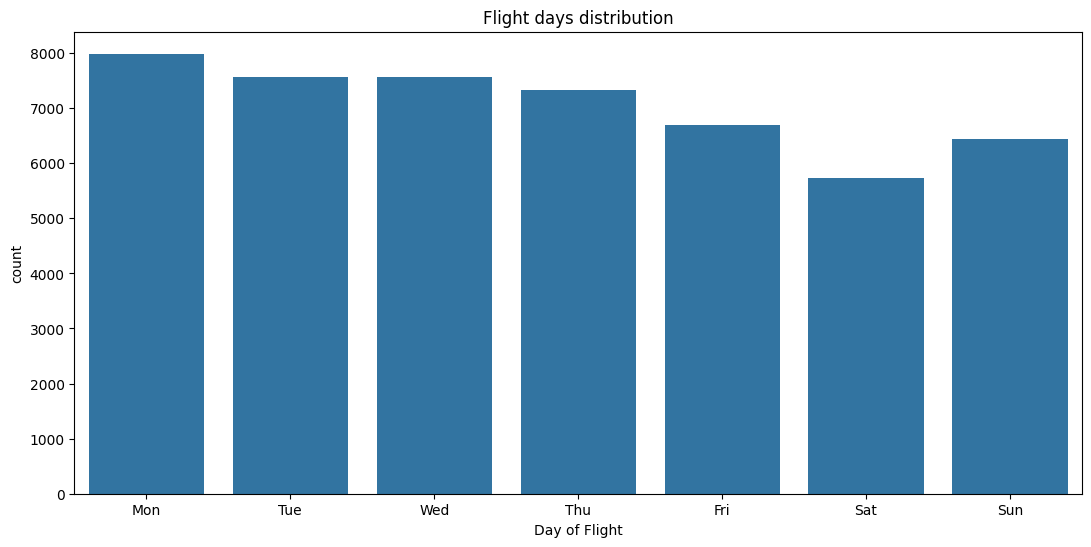

In [24]:
plt.figure(figsize=(13,6))
sns.countplot(data= customer_booking_data,x='flight_day', order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title("Flight days distribution")
plt.xlabel('Day of Flight')

In [25]:
customer_booking_data['flight_day'].value_counts()

,count
flight_day,
Mon,7988
Wed,7562
Tue,7558
Thu,7323
Fri,6685
Sun,6442
Sat,5723


📅As we can see from the count plot, **Monday** has the **highest** number of flight bookings **(7,988)**, followed closely by **Wednesday (7,562)** and **Tuesday (7,558)**.
The **lowest** number of bookings occur on **Saturday (5,723)**, suggesting that the beginning of the week is generally more popular for travel.

# 3. **Bivariate Analysis**

Now that we’ve explored the distribution of individual variables, we’ll examine how different features interact with each other. This helps us uncover deeper patterns in booking behavior.

# 3.1 `num_passengers` vs `wants_extra_baggage`

This plot compares the number of passengers with the customer's preference for extra baggage.

Text(0.5, 0, 'Num of passengers')

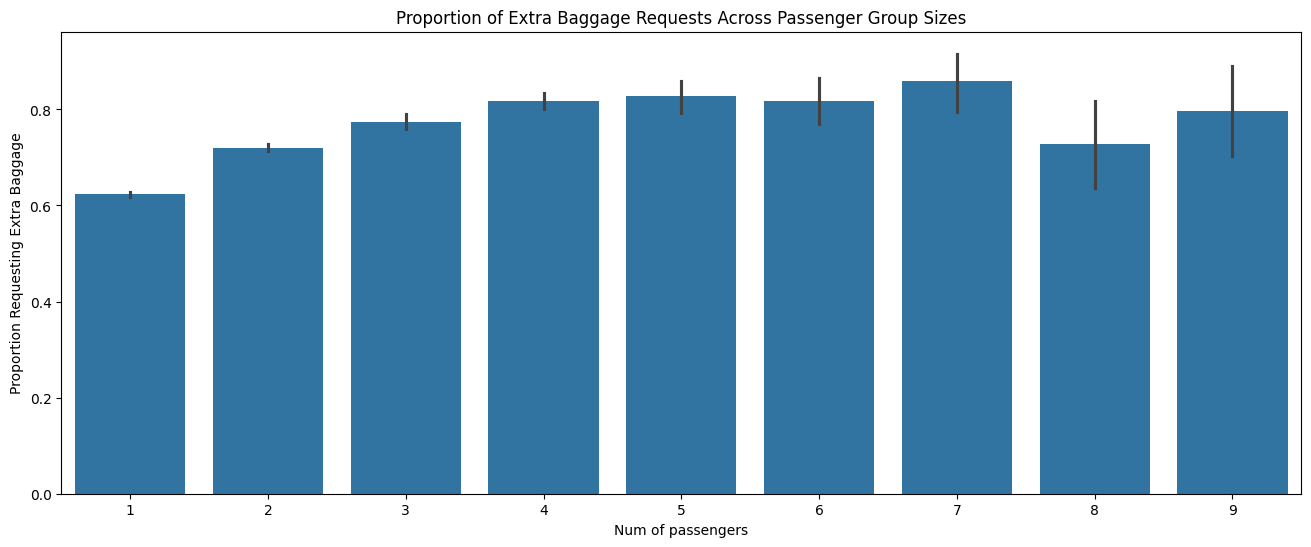

In [26]:
plt.figure(figsize=(16,6))
plt.title('Proportion of Extra Baggage Requests Across Passenger Group Sizes')
sns.barplot(data= customer_booking_data, y = 'wants_extra_baggage',x= 'num_passengers')
plt.ylabel('Proportion Requesting Extra Baggage')
plt.xlabel('Num of passengers')

In [27]:
# Group by number of passengers and calculate mean of 'wants_extra_baggage'
baggage_percent = customer_booking_data.groupby('num_passengers')['wants_extra_baggage'].mean().mul(100).round(2)
baggage_percent

,wants_extra_baggage
num_passengers,
1,62.31
2,72.03
3,77.45
4,81.78
5,82.72
6,81.85
7,85.98
8,72.73
9,79.69



📌 **Key Insights:**
Even when traveling alone, more than 60% of passengers opt for extra baggage, indicating it is a common need regardless of group size.

As the group size increases, the percentage steadily rises, peaking at nearly 86% for 7 passengers.

This trend suggests that larger groups are more likely to carry additional luggage, possibly due to longer trips or shared packing among travelers.

Interestingly, there's a small dip at 8 passengers, which may be due to a smaller sample size or group behavior (e.g., corporate or tour groups who pack lightly)

🧠 **Interpretation:**
This pattern strongly supports the idea that passengers value baggage flexibility, whether traveling solo or with others. While it's intuitive that groups need more luggage space, the high percentage among solo travelers suggests that extra baggage is a critical service and not limited to group dynamics.

# 3.2 `sales_channel` VS `trip_type`
In this section, we aim to explore the relationship between the sales channel used for booking (such as Internet or Mobile) and the type of trip selected by customers (One Way, Round Trip, Circle Trip).

This analysis can help us understand customer preferences across different platforms and how they correlate with the nature of travel



,trip_type,sales_channel,count
0,CircleTrip,Internet,112
1,CircleTrip,Mobile,4
2,OneWay,Internet,369
3,OneWay,Mobile,17
4,RoundTrip,Internet,43436
5,RoundTrip,Mobile,5343


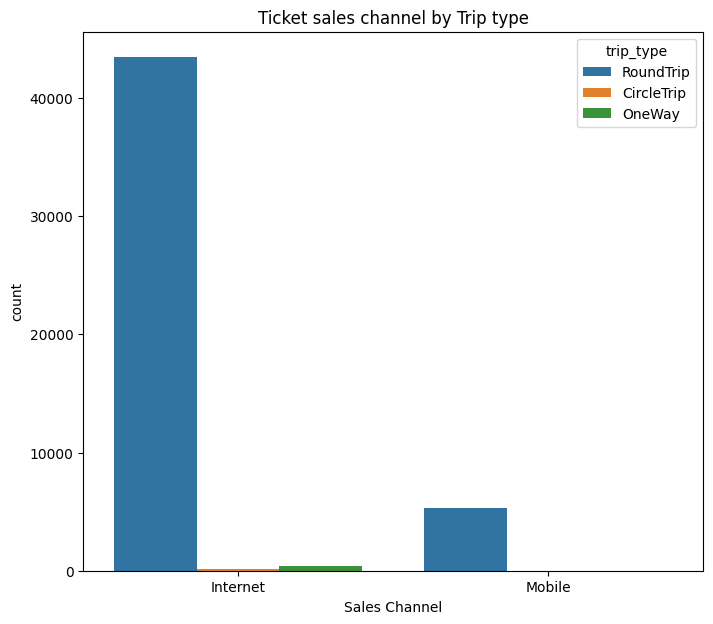

In [28]:
plt.figure(figsize=(8,7))
sns.countplot(data=customer_booking_data,x='sales_channel',hue='trip_type')
plt.title('Ticket sales channel by Trip type')
plt.xlabel('Sales Channel')
count_of_channel = customer_booking_data.groupby(['trip_type', 'sales_channel']).size().reset_index(name='count')
count_of_channel


As we can observe from the results, the majority of people prefer booking their tickets through the Internet rather than using mobile services, regardless of whether it's a round trip, one-way, or circle trip. Internet booking clearly dominates across all trip types

# 4 Multivariate analysis

**Until now, we have explored**:

**Univariate analysis** (exploring individual variables),

**Bivariate analysis** (exploring the relationship between two variables).

Now, in this section, we will dive into **multivariate analysis** to examine the relationships among three or more variables simultaneously. This deeper level of analysis allows us to uncover more complex patterns and trends in customer behavior that might not be visible through simpler comparisons

# 4.1 `trip_type` vs `sales_channel` vs `wants_extra_baggage`
In this analysis, we will explore whether passengers carrying extra baggage tend to prefer specific booking channels or types of trips

Text(0.5, 29.140624999999986, 'Sales channel')

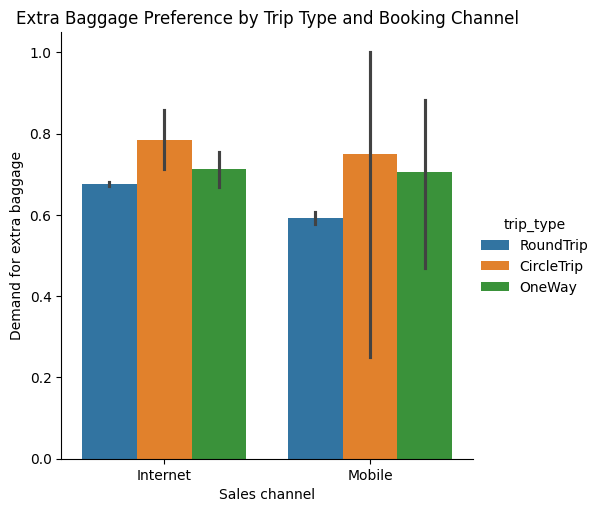

In [29]:
sns.catplot(data=customer_booking_data, kind="bar",x="sales_channel", y="wants_extra_baggage",hue="trip_type")
plt.title('Extra Baggage Preference by Trip Type and Booking Channel')
plt.ylabel('Demand for extra baggage')
plt.xlabel('Sales channel')

**Across both booking channels, passengers taking CircleTrips are the most likely to carry extra baggage, followed by OneWay, and then RoundTrip passengers.**

# 4.2 Meal Preference and Booking Completion by Country of Origin
Which countries tend to opt for in-flight meals and complete their bookings?

In [30]:
meal_booking_summary = customer_booking_data.groupby(['booking_origin','wants_in_flight_meals','booking_complete']).size().reset_index(name='count')
meal_booking_summary


,booking_origin,wants_in_flight_meals,booking_complete,count
0,(not set),0,0,40
1,(not set),0,1,12
2,(not set),1,0,24
3,(not set),1,1,2
4,Afghanistan,0,0,1
...,...,...,...,...
261,Vanuatu,0,1,1
262,Vietnam,0,0,173
263,Vietnam,0,1,68
264,Vietnam,1,0,99


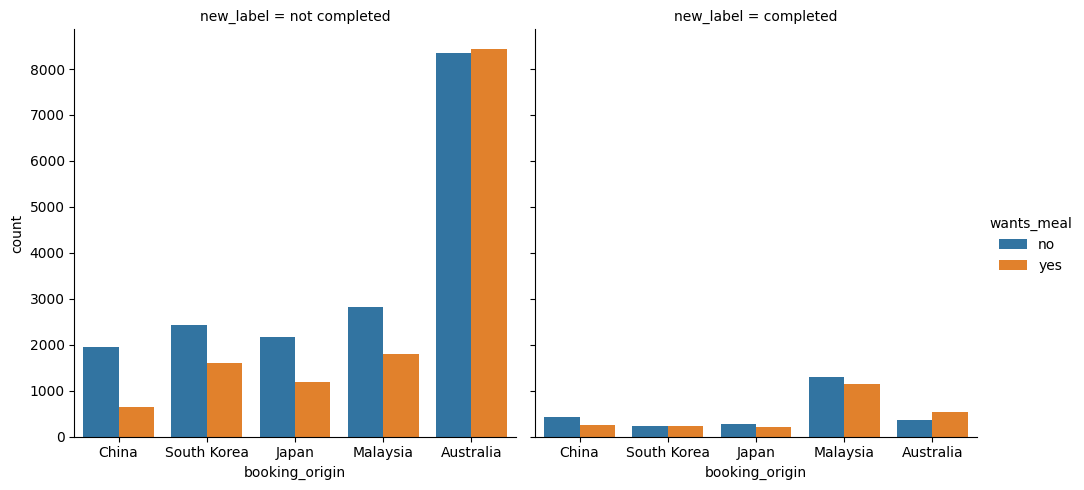

In [31]:
#indicating 0,1 to new names for better understanding
customer_booking_data['new_label']= customer_booking_data['booking_complete'].map({1: 'completed',0: 'not completed'})
customer_booking_data['wants_meal']= customer_booking_data['wants_in_flight_meals'].map({1: 'yes',0: 'no'})
# getting information of the top countries
top_countries = customer_booking_data['booking_origin'].value_counts().nlargest(5).index


filtered_data = customer_booking_data[customer_booking_data['booking_origin'].isin(top_countries)]


sns.catplot(data= filtered_data,x='booking_origin',hue= 'wants_meal',col = 'new_label',kind= 'count')

In this multivariate plot, we explored how booking origin, in-flight meal preference, and booking completion status relate to each other. **Australia has the highest number of bookings, both completed and uncompleted**, and a significant number of passengers from there opt for in-flight meals. **Other countries like Malaysia and Japan also show steady numbers. Interestingly, meal preferences seem fairly consistent across completed and uncompleted bookings**, suggesting that while meals are a valued add-on, they may not significantly influence whether a passenger completes their booking.

# 📌 Conclusion & Objectives
🎯 Objectives of This Notebook
The primary goal of this analysis was to:

->Understand the behavior of airline passengers based on their booking patterns.

->Explore the impact of factors like trip type, sales channel, extra baggage, and meal preferences on booking decisions.

->Identify trends and preferences based on country of origin and booking completion status.

->Uncover actionable insights that airlines could use to improve customer experience and operational efficiency

# 🧠 Key Insights
->Internet is the most preferred sales channel across all trip types.

->Passengers traveling with larger groups (higher number of passengers) are more likely to carry extra baggage.

->Round trips are the most common, and also dominate Internet bookings.

->Australia had the highest number of bookings and also the highest completion rate.

->Meal preferences were more common among passengers who completed their bookings.

# ✅ Conclusion
Through univariate, bivariate, and multivariate analysis, we discovered patterns in customer behavior that airlines can leverage to:

Improve digital booking platforms **(especially mobile)**.

Personalize offers based on baggage needs and trip types.

Focus marketing campaigns on countries with high booking completion rates.

**This exploratory analysis lays the foundation for predictive modeling or deeper segmentation of customer types in the future.**

![3.webp](attachment:abfbf265-d49e-4f1c-8592-32530eeed38d.webp)